# Colormaps in Napari, Matplotlib and Seaborn
Colo(u)rmaps are essential for every image analysis and data analyst as visual inspection is a powerful tool that can't be overlooked. In images colormaps are usually continuous, meaning they are a gradient between two or more colors since pixel values (usually) describe continuous measurements. In data science colormaps can be continuous for some cases (when looking at continuous measurements) but often colormaps are used to differentiate groups or clusters and in this case the colors ideally are not continuous and should be easily differentiated from eachother in order to get a clear view of the groupings.

What makes me write a blog post about colormaps is that it is nice to have one colormap for all visualisations and it's not allways straight forward to combine the format of colormaps between different libraries. The easiest way to do this is to generate your own colormap, save it and convert it to whatever format is requested by the libraries.
One thing that makes our life easier though is that all libraries usually (at some point or another) accept tupules or arrays with red, green and blue (RGB) values.

## Making your own Colormap
A helpful tool I have found is [I want Hue](https://medialab.github.io/iwanthue/), which I find really useful. It let's you choose a range of input colors and then generates a subset of colors, that (usually) are well differentiated from eachother. To make our lives even easier it also generates a list of these colors in [hexadecimal format](https://en.wikipedia.org/wiki/Hexadecimal) or as RGB arrays. I'm using the hexadecimal format as other colormap generating libraries do this too (like the [seaborn palette module](https://seaborn.pydata.org/generated/seaborn.color_palette.html)). Let's convert this hexadecimal code into arrays as a start:

In [1]:
# our colors copied directly from I want Hue
colors_hex = ["#d77b46",
"#ac6fe0",
"#8de071",
"#d774bb",
"#78a336",
"#6e93df",
"#d0ba51",
"#e35971",
"#57dfc4",
"#6bb073"]

# variable in which our color arrays will be saved
colors_array = []

# iterating over all colors
for color in colors_hex:
    
    # generating a temporary array for one color
    temp_color_array = []
    
    # iterating over the hexadecimal code:
    # two numbers in the code represent one
    # red, green or blue value
    for i in (1, 3, 5):
        # decoding the hexadecimal code into an integer
        value = int(color[i:i+2],16)
        
        # before adding it to our temporary array 
        # we'll normalise it between 0 and 1
        # since this is necessary for some 
        # colormaps
        temp_color_array.append(value/255)
    
    # adding the color value to our overall list
    colors_array.append(temp_color_array)
    
    
# now let's look at our output
colors_array

[[0.8431372549019608, 0.4823529411764706, 0.27450980392156865],
 [0.6745098039215687, 0.43529411764705883, 0.8784313725490196],
 [0.5529411764705883, 0.8784313725490196, 0.44313725490196076],
 [0.8431372549019608, 0.4549019607843137, 0.7333333333333333],
 [0.47058823529411764, 0.6392156862745098, 0.21176470588235294],
 [0.43137254901960786, 0.5764705882352941, 0.8745098039215686],
 [0.8156862745098039, 0.7294117647058823, 0.3176470588235294],
 [0.8901960784313725, 0.34901960784313724, 0.44313725490196076],
 [0.3411764705882353, 0.8745098039215686, 0.7686274509803922],
 [0.4196078431372549, 0.6901960784313725, 0.45098039215686275]]

Cool, now we have the colors in a format in which we can hand it to other libraries. If you are into a more pythonic style of generating lists you can actually shorten this code into a one liner (which is much more difficult to read but much easier to write):

In [2]:
colors_array = [list(int(color[i:i+2], 16)/255 
                for i in (1, 3, 5)) 
                for color in colors_hex]
colors_array

[[0.8431372549019608, 0.4823529411764706, 0.27450980392156865],
 [0.6745098039215687, 0.43529411764705883, 0.8784313725490196],
 [0.5529411764705883, 0.8784313725490196, 0.44313725490196076],
 [0.8431372549019608, 0.4549019607843137, 0.7333333333333333],
 [0.47058823529411764, 0.6392156862745098, 0.21176470588235294],
 [0.43137254901960786, 0.5764705882352941, 0.8745098039215686],
 [0.8156862745098039, 0.7294117647058823, 0.3176470588235294],
 [0.8901960784313725, 0.34901960784313724, 0.44313725490196076],
 [0.3411764705882353, 0.8745098039215686, 0.7686274509803922],
 [0.4196078431372549, 0.6901960784313725, 0.45098039215686275]]

## Using your Custom Colormap in Matplotlib and Seaborn
If you have labelled data that you want to mark with your custom colormap in [matplotlib](https://matplotlib.org/) or [seaborn](https://seaborn.pydata.org/), what you need to provide is a dictionary. All you need to do is have the label values as keys and colors as entries. For me the labels are usually just integers, which makes the whole process very simple:

In [3]:
color_dictionary = {}

for index, color in enumerate(colors_array):
    color_dictionary[index] = color

color_dictionary

{0: [0.8431372549019608, 0.4823529411764706, 0.27450980392156865],
 1: [0.6745098039215687, 0.43529411764705883, 0.8784313725490196],
 2: [0.5529411764705883, 0.8784313725490196, 0.44313725490196076],
 3: [0.8431372549019608, 0.4549019607843137, 0.7333333333333333],
 4: [0.47058823529411764, 0.6392156862745098, 0.21176470588235294],
 5: [0.43137254901960786, 0.5764705882352941, 0.8745098039215686],
 6: [0.8156862745098039, 0.7294117647058823, 0.3176470588235294],
 7: [0.8901960784313725, 0.34901960784313724, 0.44313725490196076],
 8: [0.3411764705882353, 0.8745098039215686, 0.7686274509803922],
 9: [0.4196078431372549, 0.6901960784313725, 0.45098039215686275]}

Let's load some data and see if this worked:

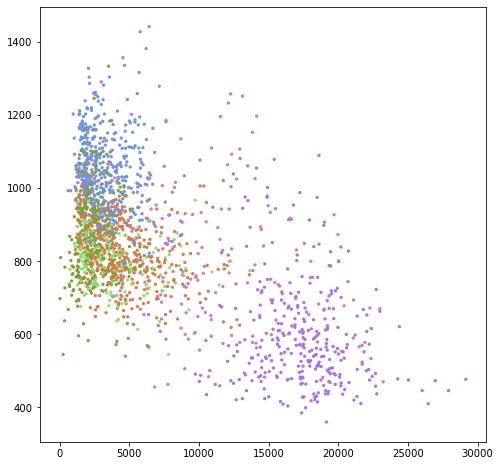

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# loading the example dataset
example_regionproperties = pd.read_csv('example regionproperties.csv')

# extracting two features to plot
datax = example_regionproperties['area'].to_numpy()
datay = example_regionproperties['max_intensity'].to_numpy()

# getting the labels for each datapoint
prediction = example_regionproperties['prediction'].to_numpy()

# making the figure a bit bigger
plt.figure(figsize=(8, 8))

# making a scatter plot and coloring 
# with our generated colormap
plt.scatter(datax, datay,
            c = [color_dictionary[int(label)] 
                 for label in prediction],
            s = 5)

And that's it! for matplotlib we're done. Now let's take a quick look at seaborn and it's beautiful pairplot:

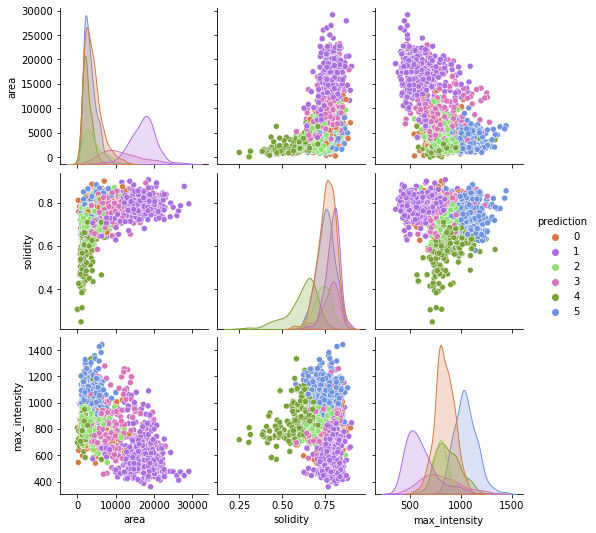

In [18]:
sns.pairplot(data = example_regionproperties,
             hue = 'prediction', 
             palette= color_dictionary)

The library form of our colormap makes it really easy to integrate into seaborn and matplotlib as you have seen. Now let's move onto the next part of the puzzle: [Napari](https://napari.org/)

## Using your Custom Colormap in Napari
When using your own colormap it's probably because you want to show clusters in your images in the same color as on your plots. This is not as trivial as it was for matplotlib and seaborn. The easiest way I have found to achieve this is to not use the labels layer but the image layer of napari. If you provide a colormap matching you label layer datatype it works. Since cluster labels are just integers usually smaller than 100 the first step is to convert your cluster label image to uint8:

In [24]:
import tribolium_clustering as tc
import pyclesperanto_prototype as cle
from skimage import io

label_image = io.imread('workflow t10.tif')
cluster_image = tc.generate_parametric_cluster_image(label_image, cle.push(label_image), prediction)
cluster_image = cluster_image.astype('uint8')

Now that the cluster image is converted to uint8 we need to make a colormap that matches this type. What that means is that our colormap has to contain 256 colors. Furthermore, napari wants the colors as RGBA values. The 'a' stands for alpha and determines how transparent the colors are. Another important aspect is that the first color should be invisible because in the cluster image all pixels with value 0 are background and should not be displayed. One last requirement for napari is that we hand the colormap as a vispy object. This conversion fortunately is quite easy.
Whew, so that's quite a few changes we have to make to our colormap:
- We have to add an alpha to all our colors before adding them back to the colormap
- We can make the colormap large enough by adding black for all the unused color values up to 256
- We can also insert a first color which is transparent to take care of the background
- Convert to vispy colormap in order to hand it to napari

In [26]:
# first we will convert our colors array to RGBA
# by adding a 1 for alpha (not transparency)
colors_rgba = [color + [1] for color in colors_array]

# now we can add a transparent background color
# to the front of the list
colors_with_background = [[0,0,0,0]] + colors_rgba

# we will fill up the rest of the colors needed with
# empty colors since our labels max out at 6
empty_colors = [[0,0,0,0] for i in range(256-len(colors_with_background))]

# combining our colormaps for napari
napari_colormap = colors_with_background + empty_colors

print('number of colors is: {}'.format(len(napari_colormap)))

from vispy.color import Colormap
# this conversion is needed to be able to hand the colormap to napari
# disabling the interpolation assures that each cluster label
# is colored correctly
vispy_colormap = Colormap(napari_colormap, interpolation = 'zero') 

256


With our colormap generated, matching our datatype and converted into a vispy colormap we can finally use it:

C:\Users\ryans\Anaconda3\envs\mstr_v1\lib\site-packages\napari\layers\base\base.py:655: UserWarning: Non-orthogonal slicing is being requested, but is not fully supported. Data is displayed without applying an out-of-slice rotation or shear component.
  warnings.warn(


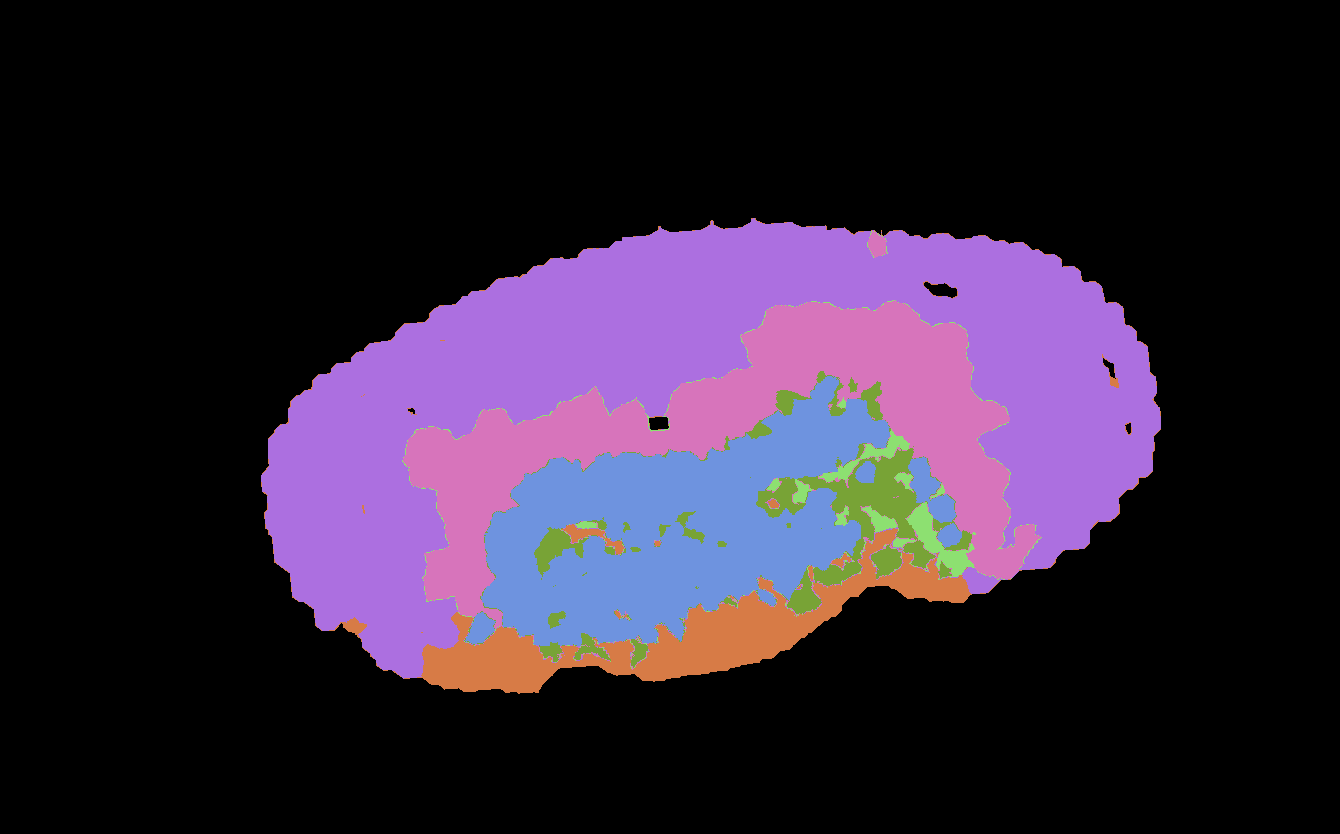

In [28]:
import napari
viewer = napari.Viewer(ndisplay=3)
viewer.add_image(cluster_image, colormap= vispy_colormap, rotate=(-30,180,85))

# taking a screenshot
napari.utils.nbscreenshot(viewer,canvas_only=True)

I hope this could help you optimes your data and image analysis workflow or save you from time spent searching for answers on forum!

## [Home](https://biapol.github.io/blog/ryan_savill/)

[Imprint](https://biapol.github.io/blog/imprint)